In [2]:
import matplotlib.pyplot as plt
import math
import random
from numpy.random import default_rng



[10000, 40000, 90000, 160000, 250000, 360000, 490000, 640000, 810000, 1000000]
3850000


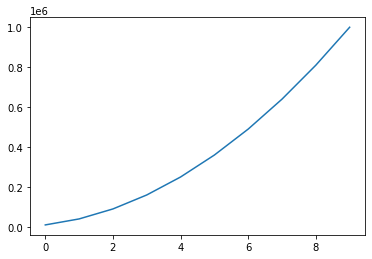

In [3]:


stakers=[]
numStakers=10
for i in range(1,numStakers+1):
    stakers.append(10000*i*i)
    
print(stakers)
stakersBefore = stakers.copy()
print(sum(stakers))
plt.figure(0)

plt.plot(stakers)
epochs=10000
dynastyEpochs=1
exposure=1000
minStake=1000
roll=0.05
tolerance = 0
blockReward = 0
#concentrationPenalty = 10000

rewardPool=0
stakes=[stakers]
    
def vote():
#     if random.random()<roll:
#         return 200
#     else:
#         return 100
    return default_rng().normal(loc=100, scale=1)
    
def penalty(stake):
    return stake//exposure

def rewards(stake, stakeGettingReward):
    return (stake*rewardPool)//stakeGettingReward

def chooseblockProposer(stakers):
    winner = math.floor(random.randrange(math.floor(sum(stakers))))
    #print(winner)
    sortedStakers=sorted(stakers)
    
    agg=0
    for i in range(len(stakers)):
        agg+=sortedStakers[len(stakers)-i-1]
        if agg>winner:
            return len(stakers)-i-1
        


    

3850000.000000011


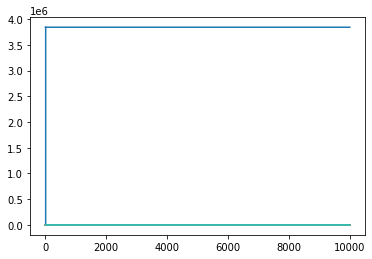

<Figure size 432x288 with 0 Axes>

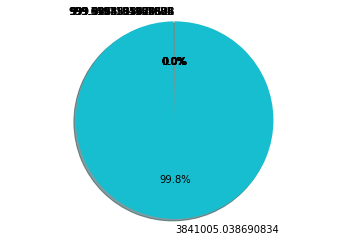

[999.0288228679523, 999.3051513020131, 999.5985815584828, 999.1562565083833, 999.9493931888586, 999.9278393926606, 999.6191103957975, 999.3587154145581, 999.0174385488604, 3841005.038690834]
[10000, 40000, 90000, 160000, 250000, 360000, 490000, 640000, 810000, 1000000]
0.09990288228679522
0.024982628782550326
0.011106650906205365
0.006244726603177396
0.0039997975727554345
0.0027775773316462797
0.00204003900080775
0.001561497992835247
0.0012333548624060004
3.8410050386908337


In [4]:

winners=[0]*numStakers

def main():
    rewardPool=0
    rewards=[0]*numStakers

    for i in range(epochs):

        votes=[]
        #print(i)
        #print(stakers)
        #print("rewardPool", rewardPool)

        #print(sum(stakers)-sum(stakersBefore))
        ## VOTE ##
        for j in range(len(stakers)):
            if stakers[j]<minStake:
                votes.append(0)
                continue
            votes.append(vote())

        #print(votes)
        
        uVotes=set(votes)
        ## WeightedVotes ##
        wVotes={}
        weights=[]
        for j in uVotes:
            weight = 0
            if j==0:
                continue
            for k in range(len(votes)):

                if j==votes[k]:
                    weight+=stakers[k]
                wVotes[j]=weight
        wVotesSorted=sorted(wVotes)
                  
        totalStake=sum(stakers)
        medianWeight = totalStake/2
        lowerCutoffWeight = totalStake/4
        higherCutoffWeight = (totalStake*3)/4
        lowerCutoff = 0
        higherCutoff = 0
        median = 0
        agg=0
        for k in ((wVotesSorted)):
            agg+=wVotes[k]
            #print(k,v)
            if lowerCutoff == 0 and agg >= lowerCutoffWeight:
                lowerCutoff = k
            if median == 0 and agg >= medianWeight:
                median = k    
            if higherCutoff == 0 and agg >= higherCutoffWeight:
                higherCutoff = k
        #print(lowerCutoff, median, higherCutoff)

        ## PENALTY ##
        stakeGettingReward=0
        for j in range(len(stakers)):
            if stakers[j]<minStake:
                continue
            if (votes[j]<lowerCutoff or votes[j]>higherCutoff) and (abs(votes[j]-median))>tolerance:
#                 print('penalizing', votes[j], lowerCutoff,higherCutoff, median, abs(votes[j]-median),tolerance )
                penalty = stakers[j]/exposure
                stakers[j]-=penalty
                rewardPool+=penalty
            else:
                rewards[j]+=1
        
        ## BLOCKREWRD ##
        winner = chooseblockProposer(stakers)
        #print(winner)
        winners[winner]+=1
        #print('winners',winners)
        #print(stakers)
        stakers[winner]+=blockReward
        #print(stakers)

        
        ## REWARD ##
        #print("rewardPool", rewardPool)
        #print("rewards",rewards)
        if (i%dynastyEpochs==0):
            #print("lets reward")
            rewardLastDynasty = rewardPool
            for j in range(len(stakers)):
                reward = (rewardLastDynasty*stakers[j]*rewards[j])/(dynastyEpochs*totalStake)
                
                stakers[j]+=reward
                rewardPool-= reward
            rewards=[0]*numStakers
        #print(stakers)

        stakes.append(stakers)

    
    
main()
print(sum(stakers))
plt.plot(stakers)
plt.figure(1)

plt.plot(stakes)

# plt.figure(2)
# # Pie chart, where the slices will be ordered and plotted counter-clockwise:
# labels = range(len(stakers))

# print('winners',winners)
# print(stakers)
# print(labels)
# fig1, ax1 = plt.subplots()
# ax1.pie(winners, labels=labels, autopct='%1.1f%%',
#          shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.show()

plt.figure(3)

fig2, ax2 = plt.subplots()
ax2.pie(stakers, labels=stakers, autopct='%1.1f%%',
         shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

print((stakers))
print((stakersBefore))

for i in range(len(stakers)):
    print(stakers[i]/stakersBefore[i])

In [191]:
default_rng().normal(loc=100, scale=1)

99.5481835066687